# 1.- Importar Librerias Relevantes

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2.- Cargar dataframes

In [2]:
path = 'C:/Users/leona/OneDrive/Documentos/Universidad/8vo Semestre/Proyecto' # use your path
df_matrix = pd.read_csv(f"{path}/Analisis variables/matriz_desercion_2.csv", encoding='utf-8-sig')

C:\Users\leona\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_matrix

,cat_periodo,codigo_unico,mrun,gen_alu,fec_nac_alu,anio_ing_carr_ori,tipo_inst_1,region_sede,valor_arancel,area_conocimiento,acreditada_carr,acreditada_inst,desertor_1,region_colegio,tipo_ensenanza_colegio,prom_notas_media,dependencia_colegio,cant_becas
0,2015,I498S6C132J2V1,37.0,1,197808,2015,Centros de Formación Técnica,Biobío,820000.0,Tecnología,NO ACREDITADA,ACREDITADA,0.0,NaN,NaN,NaN,NaN,0.0
1,2015,I111S14C309J2V1,118.0,1,199102,2015,Institutos Profesionales,Metropolitana,1390000.0,Administración y Comercio,ACREDITADA,ACREDITADA,0.0,13,310.0,4.975,3,0.0
2,2015,I106S3C64J4V1,253.0,1,198404,2015,Institutos Profesionales,Metropolitana,920000.0,Administración y Comercio,NO ACREDITADA,NO ACREDITADA,1.0,NaN,NaN,NaN,NaN,0.0
3,2015,I221S1C57J1V1,370.0,2,198910,2015,Centros de Formación Técnica,Metropolitana,1880000.0,Administración y Comercio,ACREDITADA,ACREDITADA,1.0,13,310.0,5.100,3,1.0
4,2015,I176S8C59J2V1,533.0,2,198309,2015,Institutos Profesionales,Coquimbo,1190000.0,Salud,ACREDITADA,NO ACREDITADA,0.0,4,510.0,5.200,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746509,2021,I106S6C295J4V1,26380151.0,2,199603,2020,Institutos Profesionales,Metropolitana,1459056.0,Arte y Arquitectura,NO ACREDITADA,NO ACREDITADA,0.0,NaN,NaN,NaN,NaN,0.0
2746510,2021,I260S44C120J1V1,26380152.0,2,200302,2021,Centros de Formación Técnica,Magallanes,1596000.0,Administración y Comercio,ACREDITADA,ACREDITADA,1.0,NaN,NaN,NaN,NaN,0.0
2746511,2021,I152S10C341J4V1,26453499.0,2,199208,2021,Institutos Profesionales,Metropolitana,560000.0,Educación,NO ACREDITADA,ACREDITADA,1.0,NaN,NaN,NaN,NaN,0.0
2746512,2021,I152S10C349J4V1,26453942.0,2,196501,2020,Institutos Profesionales,Metropolitana,560000.0,Administración y Comercio,NO ACREDITADA,ACREDITADA,0.0,NaN,NaN,NaN,NaN,0.0


# 3.- Limpieza de Datos (region_colegio y prom_notas_media)

In [4]:
df_matrix.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746514 entries, 0 to 2746513
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   cat_periodo             int64  
 1   codigo_unico            object 
 2   mrun                    float64
 3   gen_alu                 int64  
 4   fec_nac_alu             int64  
 5   anio_ing_carr_ori       int64  
 6   tipo_inst_1             object 
 7   region_sede             object 
 8   valor_arancel           float64
 9   area_conocimiento       object 
 10  acreditada_carr         object 
 11  acreditada_inst         object 
 12  desertor_1              float64
 13  region_colegio          object 
 14  tipo_ensenanza_colegio  float64
 15  prom_notas_media        float64
 16  dependencia_colegio     object 
 17  cant_becas              float64
dtypes: float64(6), int64(4), object(8)
memory usage: 377.2+ MB


Donde la region del colegio es object, pero se esperaria que fuera un numero. Se transforma a numerico.

In [5]:
df_matrix.region_sede.unique()

array(['Biobío', 'Metropolitana', 'Coquimbo', 'Antofagasta', 'Valparaíso',
       'Los Lagos', "Lib. Gral B. O'Higgins", 'Arica y Parinacota',
       'La Araucanía', 'Atacama', 'Los Ríos', 'Maule', 'Ñuble',
       'Magallanes', 'Tarapacá', 'Aysén'], dtype=object)

In [6]:
regiones = {"Tarapacá": 1, "Antofagasta": 2, "Atacama": 3, "Coquimbo": 4, "Valparaíso": 5, "Lib. Gral B. O'Higgins": 6,
            "Maule": 7, "Biobío": 8, "La Araucanía": 9, "Los Lagos": 10, "Aysén": 11, "Magallanes": 12,
            "Metropolitana": 13, "Los Ríos": 14, "Arica y Parinacota": 15, "Ñuble": 16}

In [7]:
df_matrix["region_sede"] = df_matrix.region_sede.replace(regiones)

In [8]:
df_matrix["region_colegio"] = pd.to_numeric(df_matrix.region_colegio, errors='coerce')
df_matrix["region_sede"] = pd.to_numeric(df_matrix.region_sede, errors='coerce')

In [9]:
print('Number of instances = %d' % (df_matrix.shape[0]))
print('Number of attributes = %d' % (df_matrix.shape[1]))

print('Number of missing values:')
for col in df_matrix.columns:
    print('\t%s: %d' % (col,df_matrix[col].isna().sum()))

Number of instances = 2746514
Number of attributes = 18
Number of missing values:
	cat_periodo: 0
	codigo_unico: 0
	mrun: 0
	gen_alu: 0
	fec_nac_alu: 0
	anio_ing_carr_ori: 0
	tipo_inst_1: 0
	region_sede: 0
	valor_arancel: 0
	area_conocimiento: 0
	acreditada_carr: 0
	acreditada_inst: 0
	desertor_1: 0
	region_colegio: 349873
	tipo_ensenanza_colegio: 349051
	prom_notas_media: 349051
	dependencia_colegio: 356783
	cant_becas: 0


Notar que existen 349.051 datos faltantes en estas columnas, lo cual corresponde a casi el 13% de los datos. Veamos si hay alguna correlación fuerte con la región de la institucion de educacion superior.

In [10]:
df_matrix['region_colegio'].corr(df_matrix['region_sede'])

0.824722707830259

Como tiene una alta correlación (sobre 80%), se reemplazará los nans por las regiones de sede.

In [11]:
df_matrix.region_colegio.fillna(df_matrix.region_sede, inplace=True)

Con respecto a las notas, veamos como es la distribución

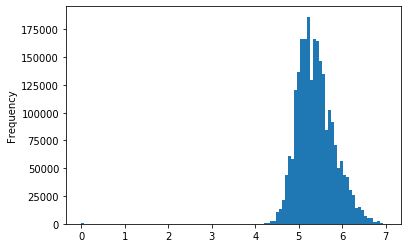

In [12]:
df_matrix.prom_notas_media.plot.hist(bins=100)

Se puede apreciar una distribución normal, rellenemos los datos con valores de esta distribucion

In [13]:
mean = df_matrix["prom_notas_media"].mean()
std = df_matrix["prom_notas_media"].std()

In [14]:
df_matrix["prom_notas_media"].fillna(pd.Series([np.random.normal(mean, std) for x in range(len(df_matrix))]), inplace=True)

In [15]:
df_matrix[["region_colegio", "prom_notas_media"]].describe()

,region_colegio,prom_notas_media
count,2.746514e+06,2.746514e+06
mean,9.658586e+00,5.393659e+00
std,3.931288e+00,4.285672e-01
min,1.000000e+00,0.000000e+00
25%,6.000000e+00,5.100000e+00
50%,1.000000e+01,5.350000e+00
75%,1.300000e+01,5.650000e+00
max,1.600000e+01,7.352766e+00


Como se utilizó una distribución normal para rellenar los NANs, hay notas mayores a 7 y menores a 1.

In [16]:
df_matrix["prom_notas_media_v2"] = np.where(df_matrix["prom_notas_media"]>7, 7, 
                                   np.where(df_matrix["prom_notas_media"]<1, 1, df_matrix["prom_notas_media"]))

In [17]:
df_matrix[["region_colegio", "prom_notas_media_v2"]].describe()

,region_colegio,prom_notas_media_v2
count,2.746514e+06,2.746514e+06
mean,9.658586e+00,5.393950e+00
std,3.931288e+00,4.252060e-01
min,1.000000e+00,1.000000e+00
25%,6.000000e+00,5.100000e+00
50%,1.000000e+01,5.350000e+00
75%,1.300000e+01,5.650000e+00
max,1.600000e+01,7.000000e+00


In [18]:
df_matrix["anio_desercion"] = df_matrix["cat_periodo"] + 1

# 4.- Graficos

## Regiones

In [19]:
regiones2 = dict(zip(regiones.values(), regiones.keys()))

In [20]:
df = df_matrix[["anio_desercion", "desertor_1", "region_colegio", "prom_notas_media_v2"]]

In [21]:
df2 = df.groupby(["anio_desercion", "region_colegio"])["desertor_1"].mean().reset_index()
df2["desertor_1"] = df2["desertor_1"]*100
df3 = df2[df2["anio_desercion"]<=2020]

Text(0.5, 15.0, 'Años')

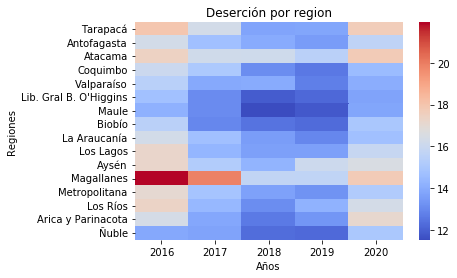

In [22]:
piv = df3.pivot("region_colegio", "anio_desercion", "desertor_1")
piv = piv.rename(index=regiones2)
ax = sns.heatmap(piv, cmap="coolwarm")
ax.set_title("Deserción por region")
ax.set_ylabel("Regiones")
ax.set_xlabel("Años")

## Notas

In [51]:
df4 = df[(df["prom_notas_media_v2"]>=4) & (df["anio_desercion"]<=2020)]

In [24]:
!pip install seaborn==0.11.0

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.0
    Uninstalling seaborn-0.12.0:
      Successfully uninstalled seaborn-0.12.0


Text(0.5, 0, 'Promedio')

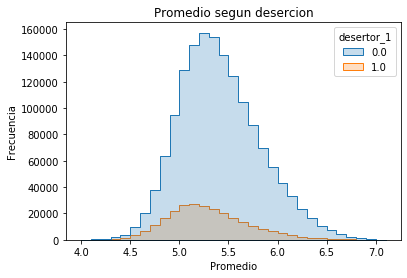

In [88]:
ax = sns.histplot(data=df4, x="prom_notas_media_v2", binwidth = 0.1, hue="desertor_1", element="step")
ax.set_title("Promedio segun desercion")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Promedio")

Text(0.5, 0, 'Promedio')

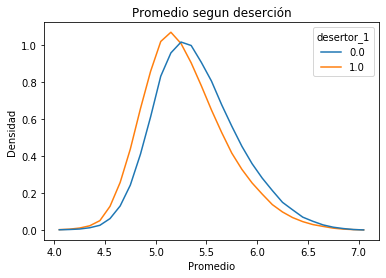

In [100]:
ax = sns.histplot(data=df4, x="prom_notas_media_v2", binwidth = 0.1, hue="desertor_1", element="poly",
                 stat="density", common_norm=False, fill=False)
ax.set_title("Promedio segun deserción")
ax.set_ylabel("Densidad")
ax.set_xlabel("Promedio")

In [54]:
df5 = df4[df4["desertor_1"] == 1]

Text(0.5, 0, 'Promedio')

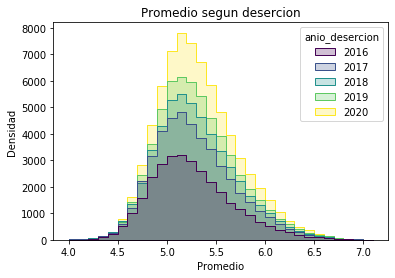

In [64]:
ax = sns.histplot(data=df5, x="prom_notas_media_v2", binwidth = 0.1, hue="anio_desercion", element="step",
                 palette = "viridis")
ax.set_title("Promedio segun desercion")
ax.set_ylabel("Densidad")
ax.set_xlabel("Promedio")

Text(0.5, 0, 'Promedio')

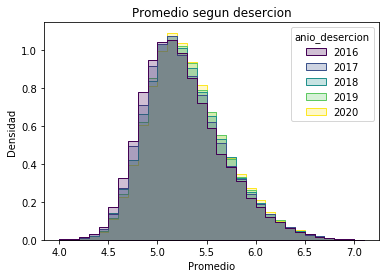

In [66]:
ax = sns.histplot(data=df5, x="prom_notas_media_v2", binwidth = 0.1, hue="anio_desercion", element="step",
                 stat="density", common_norm=False, palette = "viridis")
ax.set_title("Promedio segun desercion")
ax.set_ylabel("Densidad")
ax.set_xlabel("Promedio")

Text(0.5, 0, 'Promedio')

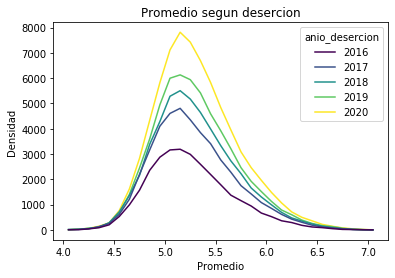

In [102]:
ax = sns.histplot(data=df5, x="prom_notas_media_v2", binwidth = 0.1, hue="anio_desercion", element="poly",
                 fill=False, palette = "viridis")
ax.set_title("Promedio segun desercion")
ax.set_ylabel("Densidad")
ax.set_xlabel("Promedio")

Text(0.5, 0, 'Promedio')

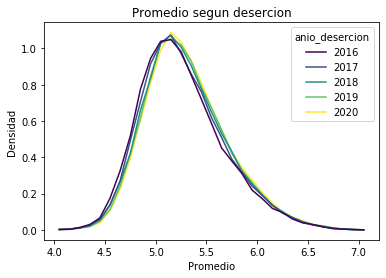

In [103]:
ax = sns.histplot(data=df5, x="prom_notas_media_v2", binwidth = 0.1, hue="anio_desercion", element="poly",
                 stat="density", common_norm=False, fill=False, palette = "viridis")
ax.set_title("Promedio segun desercion")
ax.set_ylabel("Densidad")
ax.set_xlabel("Promedio")

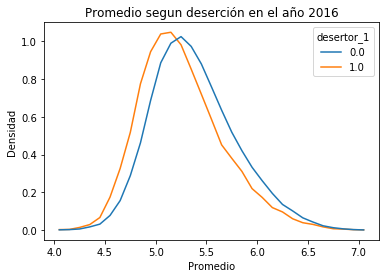

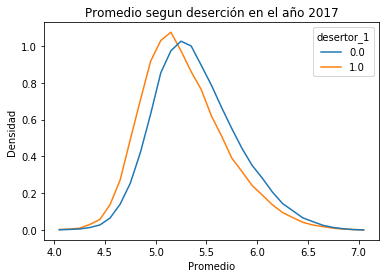

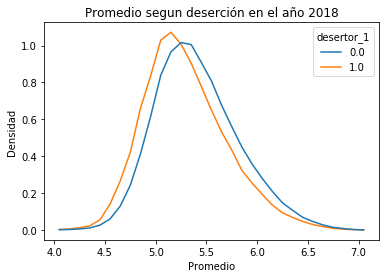

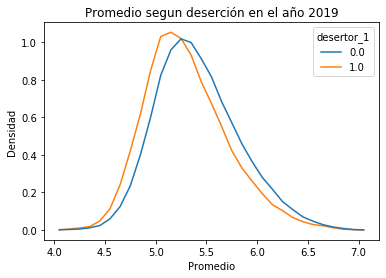

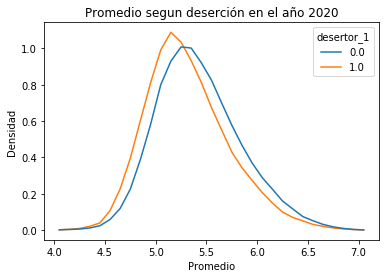

In [114]:
anhos = [2016,2017,2018,2019,2020]
for anho in anhos:
    df = df4[df4["anio_desercion"]==anho]
    plt.figure()
    ax = sns.histplot(data=df, x="prom_notas_media_v2", binwidth = 0.1, hue="desertor_1", element="poly",
                 stat="density", common_norm=False, fill=False)
    ax.set_title("Promedio segun deserción en el año " + str(anho))
    ax.set_ylabel("Densidad")
    ax.set_xlabel("Promedio")

# 5.- Regresiones Lineales

## Region

In [122]:
df6 = pd.get_dummies(df4, columns=['region_colegio'])

In [127]:
import statsmodels.api as sm  # Librería para realizar las regresiones
y = df6["desertor_1"]
X = df6[["region_colegio_1.0", "region_colegio_2.0", "region_colegio_3.0", "region_colegio_4.0", "region_colegio_5.0",
         "region_colegio_6.0", "region_colegio_7.0", "region_colegio_8.0", "region_colegio_9.0", "region_colegio_10.0",
         "region_colegio_11.0", "region_colegio_12.0", "region_colegio_13.0", "region_colegio_14.0", 
         "region_colegio_15.0"]]
X = sm.add_constant(X) 

In [128]:
# Realizamos una regresión lineal con los datos
res_1 = sm.OLS(y, X).fit() 
res_1.summary()  # Se imprime un resumen de los resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desertor_1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     60.80
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.05e-184
Time:                        00:21:29   Log-Likelihood:            -6.6143e+05
No. Observations:             1802147   AIC:                         1.323e+06
Df Residuals:                 1802131   BIC:                         1.323e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1340      0.002     77.868      0.000       0.131       0.137
region_colegio_1.0      0.0236      0.003      8.386      0.000       0.018       0.029
region_colegio_2.0      0.0128      0.002      5.747      0.000       0.008       0.017
region_colegio_3.0      0.0318      0.003     11.578      0.000       0.026       0.037
region_colegio_4.0      0.0059      0.002      2.758      0.006       0.002       0.010
region_colegio_5.0      0.0044      0.002      2.311      0.021       0.001       0.008
region_colegio_6.0     -0.0047      0.002     -2.297      0.022      -0.009      -0.001
region_colegio_7.0     -0.0067      0.002     -3.307      0.001      -0.011      -0.003
region_colegio_8.0      0.0007      0.002      0.389      0.697      -0.003       0.005
region_colegio_9.0      0.0079      0.002      3.805      0.000       0.004       0.012
region_colegio_10.0     0.0134      0.002      6.259      0.000       0.009       0.018
region_colegio_11.0     0.0240      0.004      6.411      0.000       0.017       0.031
region_colegio_12.0     0.0424      0.003     13.350      0.000       0.036       0.049
region_colegio_13.0     0.0115      0.002      6.527      0.000       0.008       0.015
region_colegio_14.0     0.0150      0.003      5.966      0.000       0.010       0.020
region_colegio_15.0     0.0112      0.003      4.047      0.000       0.006       0.017
==============================================================================
Omnibus:                   636854.862   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1618133.362
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                       5.191   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Notas

In [117]:
import statsmodels.api as sm  # Librería para realizar las regresiones
y = df4["desertor_1"]
x_1 = df4["prom_notas_media_v2"]
x_1 = sm.add_constant(x_1) 

In [118]:
# Realizamos una regresión lineal con los datos
res_1 = sm.OLS(y, x_1).fit() 
res_1.summary()  # Se imprime un resumen de los resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desertor_1   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 1.748e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:54:56   Log-Likelihood:            -6.5319e+05
No. Observations:             1802147   AIC:                         1.306e+06
Df Residuals:                 1802145   BIC:                         1.306e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5866      0.003    174.051      0.000       0.580       0.593
prom_notas_media_v2    -0.0826      0.001   -132.222      0.000      -0.084      -0.081
==============================================================================
Omnibus:                   626732.889   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1571349.894
Skew:                           2.019   Prob(JB):                         0.00
Kurtosis:                       5.151   Cond. No.                         72.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""